## Convolution Neural Network

### A Hello World Program for CNN: Fashion MNIST

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Book']

In [4]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
assert x_train.shape == (60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [9]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

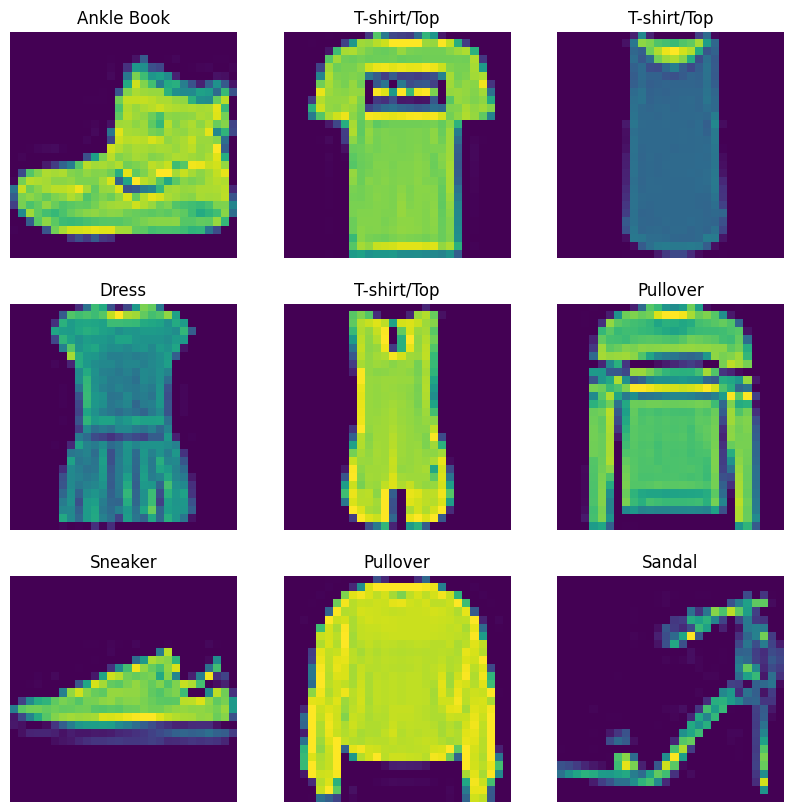

In [15]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

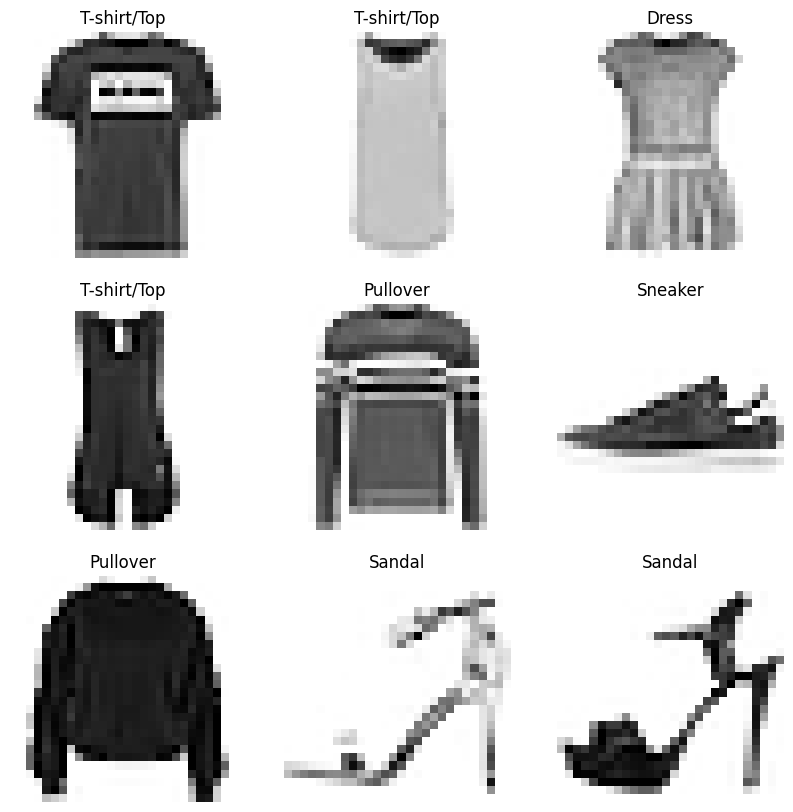

In [14]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i+1],cmap="Greys")
    plt.title(class_names[y_train[i+1]])
    plt.axis("off")

## Normal Neural Network

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [17]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [18]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5161 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.8613
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3558 - accuracy: 0.8717
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3296 - accuracy: 0.8801
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3137 - accuracy: 0.8853
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3002 - accuracy: 0.8905
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.8950
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.8971
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2694 - accuracy: 0.9002
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2606 - accurac

In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8673


## Introduction to CNN

[![cnn](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [22]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [23]:
model.fit(x_train,y_train,epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8638

1875/1875 [==============================] - 354s 189ms/step - loss: 0.3737 - accuracy: 0.8638
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2455 - accuracy: 0.9094

1875/1875 [==============================] - 336s 179ms/step - loss: 0.2455 - accuracy: 0.9094
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.1979 - accuracy: 0.9262

1875/1875 [==============================] - 330s 176ms/step - loss: 0.1979 - accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9385

1875/1875 [==============================] - 325s 173ms/step - loss: 0.1630 - accuracy: 0.9385
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.1333 - accuracy: 0.9503

1875/1875 [==============================] - 329s 175ms/step - loss: 0.1333 - accuracy: 0.9503


## Prediction

In [44]:
sample_img = x_test[0]

In [45]:
sample_img.shape

(28, 28)

In [46]:
import numpy as np

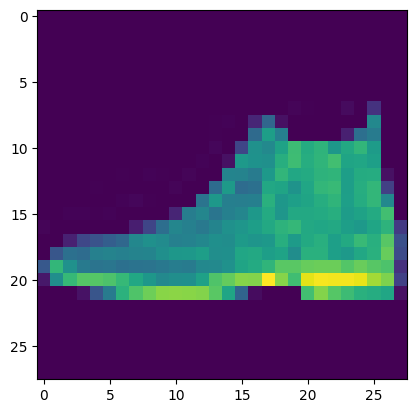

In [47]:
plt.imshow(sample_img)

In [48]:
img = np.expand_dims(sample_img,axis=0)
img.shape

(1, 28, 28)

In [49]:
pred = model.predict(img)

1/1 [==============================] - 0s 27ms/step


In [50]:
pred

array([[1.5389809e-13, 5.6969488e-11, 1.2798585e-11, 6.4466072e-14,
        1.6225296e-13, 5.4488119e-08, 1.9205358e-12, 4.2183993e-07,
        1.6735180e-12, 9.9999952e-01]], dtype=float32)

In [55]:
print(f"Predicted: {class_names[np.argmax(pred)]}\nActual: {class_names[y_test[0]]}")

Predicted: Ankle Book
Actual: Ankle Book
